<a href="https://colab.research.google.com/github/Danielgazza/Analyzing-and-predicting-Customer-Churn-for-Polarity-Venture-Telecom-Company/blob/main/telecom_Churn_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing Customer Churn for Polarity Venture Telecom Company**




**Introduction:**

In the dynamic world of telecom services, understanding customer behavior and minimizing churn is crucial for business success. Polarity Venture, a telecom company, recognizes the importance of retaining its customer base. To achieve this, the company has collected comprehensive customer-level data, encompassing various attributes related to the services they use. This dataset provides a wealth of insights into customer patterns, preferences, and behavior.

**Objectives for this Analysis:**

This analysis aims to delve into the provided dataset and extract meaningful insights to address the following key objectives:

* ***Identify Contributing Variables to Customer Churn:*** By exploring the dataset, we intend to uncover the factors that play a significant role in customer churn. We will analyze the attributes associated with customers who decide to leave the telecom services and understand the patterns that contribute to this behavior.

* ***Profile Customers More Likely to Churn:***
 Through data exploration and analysis, we will identify customer segments that are more likely to churn. By understanding the characteristics and behaviors of these segments, we can tailor retention strategies to address their specific needs and concerns.

* ***Propose Actionable Strategies for Churn Mitigation:*** Armed with insights from the data, we will develop data-driven strategies to minimize churn rates. These strategies may include personalized incentives, targeted marketing campaigns, improved customer service, and optimizing service offerings.

In summary, this analysis seeks to empower Polarity Venture with actionable insights that can guide strategic decisions to reduce customer churn. By understanding the variables contributing to churn and identifying high-risk customer segments, the company can proactively engage customers and implement effective retention measures, ultimately enhancing customer satisfaction and business sustainability.






In [ ]:
# Loading the Data
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset into a DataFrame
data = pd.read_csv("telecom_churn.csv")

# Check for missing values
data.isnull().sum()



Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

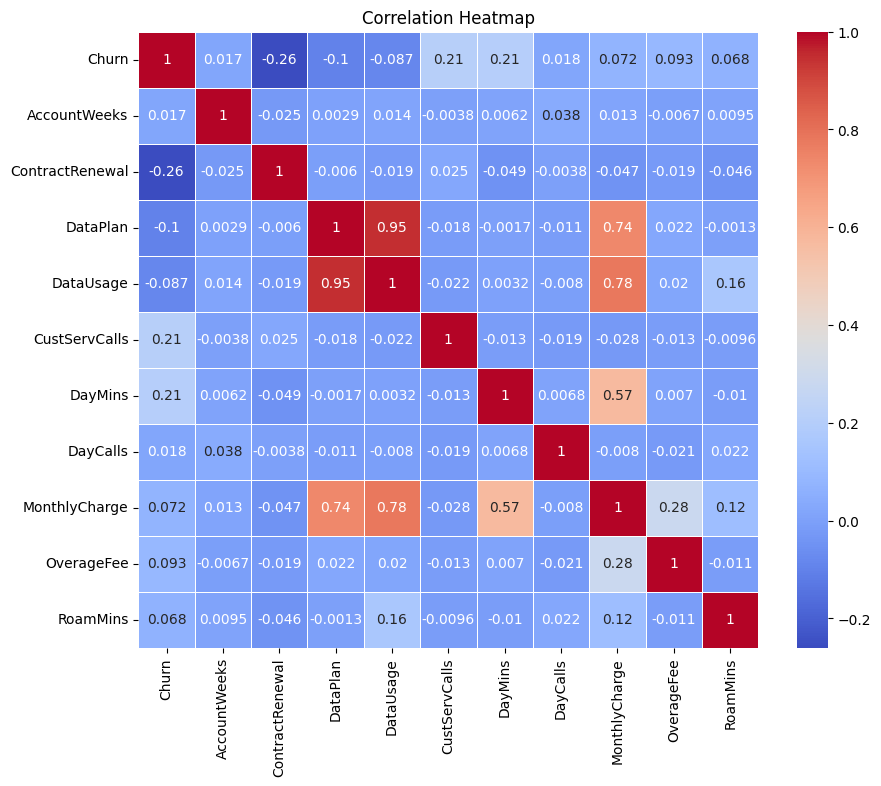

In [ ]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

A positive correlation (close to 1) between two variables suggests that as one variable increases, the other tends to increase as well.
A negative correlation (close to -1) indicates that as one variable increases, the other tends to decrease.
A correlation close to 0 signifies a weak or no linear relationship between the variables.

Dark red or dark blue squares suggest strong correlations.
Lighter colors indicate weaker correlations.
Squares closer to white signify variables with little or no correlation.

In [22]:
# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Select relevant features using SelectKBest and f_classif
num_features = 5  # Choose the number of top features to select
selector = SelectKBest(score_func=f_classif, k=num_features)
X_new = selector.fit_transform(X, y)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_indices]

print("Selected features:", selected_features)

Selected features: Index(['ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins',
       'OverageFee'],
      dtype='object')


 The analysis objectives of identifying customers more likely to churn, you can focus on selecting relevant features that might have a strong influence on customer churn

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create a logistic regression model
logreg = LogisticRegression()

# Use grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, scoring=make_scorer(accuracy_score), cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the full training dataset
best_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=1, penalty='l1', solver='liblinear')

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predictions on the testing dataset
y_pred = best_model.predict(X_test)

# Calculate different evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8590704647676162
Precision: 0.6206896551724138
Recall: 0.1782178217821782
F1-Score: 0.2769230769230769
ROC-AUC: 0.5793915964034565
Confusion Matrix:
[[555  11]
 [ 83  18]]


**Accuracy:** This is like a report card for the model. It tells us how often the model's predictions were correct. In this case, the model got around 86% of predictions right.

**Precision:** Imagine the model as a detective. Precision is like how many times the detective was right when they said something was positive (like saying a customer will churn). The model's precision is about 62%.

**Recall:** This is how many times the detective actually found all the positive cases. If there were 100 customers who churned, the model correctly found about 18 of them.

**F1-Score:** It's like combining precision and recall into one number. It helps us see if the detective is good at both finding positives and being right when they say something is positive. Here, the F1-Score is around 28%.

**ROC-AUC:** Think of this as the model's ability to separate the good guys from the bad guys. A higher value (closer to 1) is better. Here, the model's ability to do this is around 58%, which means it's making an effort, but there's room for improvement.

**Confusion Matrix:** This is like a summary of the detective's results. It shows how many times the detective got things right and how many times it got things wrong. The numbers look like this:

**Top Left (True Negatives):** Around 555 times, the model correctly said a customer won't churn, and they didn't.
**Top Right (False Positives):** About 11 times, the model incorrectly said a customer will churn, but they didn't.
**Bottom Left (False Negatives):** Around 83 times, the model incorrectly said a customer won't churn, but they did.
**Bottom Right (True Positives):** Around 18 times, the model correctly said a customer will churn, and they did.

**Feature Importance**

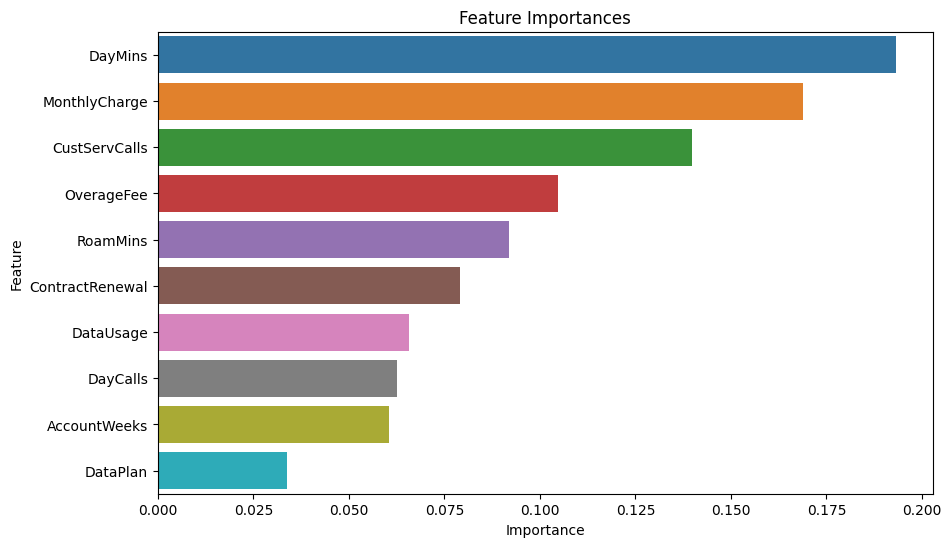

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Add this import
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


When we're trying to predict something like whether a customer will leave our telecom company (churn), some factors might be more important than others. This chart shows us which factors really matter

**Predictions**

In [21]:
# Use the trained model to make predictions on the test dataset
predictions = best_model.predict(X_test)

# Display the predictions
print(predictions)


# Replace 'predictions' with the actual predicted values
# Example: predictions = np.array([0, 1, 0, ...])
# Make sure the length of 'predictions' matches the number of samples in your test dataset

# Calculate the number of customers likely to churn (predicted as 1)
likely_to_churn = np.sum(predictions == 1)

# Calculate the number of customers not churning (predicted as 0)
not_churning = np.sum(predictions == 0)

# Calculate the total number of customers
total_customers = len(predictions)

# Display the results
print("Likely to churn:", likely_to_churn, "customers")
print("Not Churning:", not_churning, "customers")
print("Total Customers:", total_customers, "customers")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 

The predicted outcomes are a series of numbers (0s and 1s) that tell us what the model thinks about each customer. Specifically:

0: This means the model predicts that the customer is not likely to churn, meaning they are likely to stay with the telecom company.

1: This means the model predicts that the customer is likely to churn, meaning they might leave the telecom company.

**Identifying High-Risk Customers:**

Predictions and Feature Importance: Customers who have a prediction of 1 and are associated with high feature importance scores are more likely to churn. These features might include factors like frequent customer service calls, high monthly charges, low data usage, and more. High-risk customers are those where multiple important factors suggest a higher likelihood of churn.

**Recommendations(Designing Retention Strategies):**

Based on the insights from the model, you can design strategies to retain high-risk customers:

* **Personalized Incentives:** Offer personalized incentives to high-risk customers to encourage them to stay. For example, provide discounts, special offers, or bonus services tailored to their preferences and needs.

* **Improved Customer Service:** Focus on improving customer service for high-risk customers. Address their concerns promptly and provide solutions that meet their needs.

* **Discounts on Plans:** Consider offering discounted plans or packages to high-risk customers to make their services more cost-effective and attractive.

* **Engagement Campaigns:** Develop targeted engagement campaigns to communicate with high-risk customers. Send them relevant content, updates, and offers to remind them of the value of your services.

* **Feedback Collection:** Regularly collect feedback from high-risk customers to understand their concerns and pain points. Use this feedback to make improvements and show that you value their opinions.

***Continuous Monitoring and Learning:***

Keep in mind that the model's predictions and strategies are not static. Regularly monitor customer behavior and adapt your strategies based on their responses. As the telecom landscape evolves, customer preferences change, and new factors emerge, it's important to continuously refine your strategies.

Remember that while the model can provide insights, human judgment and empathy are crucial in designing effective retention strategies. Customers are individuals with unique circumstances, and a human touch in your interactions can make a significant difference in retaining them.




